<a href="https://colab.research.google.com/github/Huynh-Truong-75/Project-CNN/blob/main/Food_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**link data train https://drive.google.com/drive/folders/18IrUjQ0buStFNhnoQY6p9wz9BWl6pX4q?usp=sharing**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot            as plt
from matplotlib.image               import imread
from os                             import listdir
from numpy                          import asarray
from numpy                          import save
from tensorflow.keras.utils         import load_img, img_to_array
from keras.models                   import Sequential
from keras.layers                   import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot            as plt
from tensorflow.keras.utils         import load_img, img_to_array
from tensorflow.keras.optimizers    import SGD
import numpy                        as np

**Tạo Data Train**

In [ ]:
imgs, labels = list(), list()
banhbao = '/content/drive/MyDrive/food/banhbao/'
banhcuon = '/content/drive/MyDrive/food/banhcuon/'
banhmi = '/content/drive/MyDrive/food/banhmi/'
bunrieu = '/content/drive/MyDrive/food/bunrieu/'
tomnuong = '/content/drive/MyDrive/food/tomnuong/'

def food_train(path, output, food):
  for file in listdir(path):
    if file.startswith(food):
      img = load_img(path+file,target_size=(150,150))
      img = img_to_array(img)
      imgs.append(img)
      labels.append(output)

food_train(banhbao, 0, str(1))
food_train(banhcuon, 1, str(2))
food_train(banhmi, 2, str(3))
food_train(bunrieu, 3, str(4))
food_train(tomnuong, 4, str(5))

In [ ]:
imgs = asarray(imgs)
labels = asarray(labels)
print(imgs.shape,labels.shape)

save('flower_imgs.npy', imgs)
save('flower_labels.npy', labels)

(100, 150, 150, 3) (100,)


**Xây Dựng Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(150,150,3), padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(512, activation='relu')) 
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 128)      0

**Biên Dịch và Train model**

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(imgs, labels, batch_size=64,epochs=50, verbose=2)
model.save('food.h5')

Epoch 1/50
2/2 - 10s - loss: 92.3319 - accuracy: 0.1700 - 10s/epoch - 5s/step
Epoch 2/50
2/2 - 0s - loss: 132.2345 - accuracy: 0.2300 - 96ms/epoch - 48ms/step
Epoch 3/50
2/2 - 0s - loss: 12.5387 - accuracy: 0.1600 - 95ms/epoch - 48ms/step
Epoch 4/50
2/2 - 0s - loss: 2.3886 - accuracy: 0.2300 - 94ms/epoch - 47ms/step
Epoch 5/50
2/2 - 0s - loss: 1.5179 - accuracy: 0.3800 - 93ms/epoch - 47ms/step
Epoch 6/50
2/2 - 0s - loss: 1.3866 - accuracy: 0.3300 - 97ms/epoch - 48ms/step
Epoch 7/50
2/2 - 0s - loss: 1.2476 - accuracy: 0.5100 - 95ms/epoch - 47ms/step
Epoch 8/50
2/2 - 0s - loss: 1.8578 - accuracy: 0.4600 - 96ms/epoch - 48ms/step
Epoch 9/50
2/2 - 0s - loss: 1.3092 - accuracy: 0.4000 - 98ms/epoch - 49ms/step
Epoch 10/50
2/2 - 0s - loss: 1.1973 - accuracy: 0.5300 - 95ms/epoch - 47ms/step
Epoch 11/50
2/2 - 0s - loss: 0.8626 - accuracy: 0.7900 - 95ms/epoch - 47ms/step
Epoch 12/50
2/2 - 0s - loss: 0.9019 - accuracy: 0.6500 - 95ms/epoch - 48ms/step
Epoch 13/50
2/2 - 0s - loss: 0.8557 - accuracy:

**Dự Đoán Dữ Liệu Mới**

1/1 [==============================] - 0s 237ms/step
banhmi


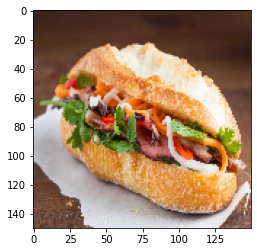

In [ ]:
#def prediction(food):
classes = ["banhbao","banhcuon","banhmi","bunrieu","tomnuong"]

img = load_img(f'/content/drive/MyDrive/predict/food_redict/banhmi1.jpg', target_size=(150,150))
plt.imshow(img)

imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255

a = int(np.argmax(model.predict(imgRe), axis=1))
print(classes[a])

1/1 [==============================] - 0s 16ms/step
bunrieu


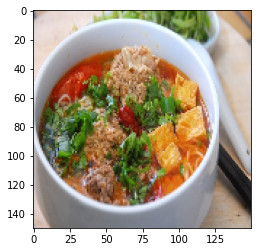

In [ ]:
classes = ["banhbao","banhcuon","banhmi","bunrieu","tomnuong"]

img = load_img(f'/content/drive/MyDrive/predict/food_redict/bunrieu2.jpg', target_size=(150,150))
plt.imshow(img)

imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255

a = int(np.argmax(model.predict(imgRe), axis=1))
print(classes[a])